# Over the Educational System and Environments

The **Nacional High School Exam**, or [ENEM](https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem), takes place every year - since 1998 - and it's the bigger exam in Brazil, with around [5 million entries per year](http://portal.inep.gov.br/artigo/-/asset_publisher/B4AQV9zFY7Bv/content/5-8-milhoes-estao-inscritos-para-fazer-o-enem-2020/21206#:~:text=Finalizadas%20as%20etapas%20de%20inscri%C3%A7%C3%A3o,Ensino%20M%C3%A9dio%20(Enem)%202020.).

Last year, the exam was a little different, due to the coronavirus, that led to the postponement of the test, a lot of preventive [measures](https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem/orientacoes/medidas-de-prevencao-a-covid-19) for the examination and the geatest abstention in history: [more than half of the candidates did not take the ENEM test](https://educacao.uol.com.br/noticias/2021/01/17/mec-culpa-medo-da-covid-19-e-midia-contra-por-abstencao-de-515-no-enem.htm).

![](https://github.com/KenzoBH/Data-Science/blob/main/Images/Slide3.PNG)

Indeed, it is a grat experience in the Brazilian student life that seeks a place in the university, since ENEM is a gateaway to several colleges over the country - in addition to being the selective proccess of Federal Universities in Brazil. Many universities (including the public ondes), in addition to their own entrance exams, offer exclusive places for the exam, through SiSU *(Unified Selection System)*, and a lot of private universities offer scholarships to participants regarding their exam scores.

The ENEM occours in two days: one reserved for Humanities, Languages and Composition, and the other one for Mathematics and Nature Sciences (currently, the test follows this patterm, but it was already different, and may be different at the moment of your reading).

In this article, we will explore the data - available by [Inep](https://enem.inep.gov.br/participante/), the body responsible for the ENEM - related to the 2007 to 2015 exams organized by school. I will focus on the city of São Paulo, where I am from. 

It's notable that the school at which candidate studied has a strong influence on his performance. Often, at not so good schools, many seek to take preparatory courses for ENEM.
We will see the relationship between the nature of the school and the performace of its students. How does the environment influence the candidate's future? It influence in fact? Let's take a look!

***

## Summary

1. [Data import](https://github.com/KenzoBH/Data-Science/blob/main/ENEM_R/ENEM_R.md#1-importa%C3%A7%C3%A3o-do-dataset)
    1. Cleaning
2. Brazil
3. [São Paulo](https://github.com/KenzoBH/Data-Science/blob/main/ENEM_R/ENEM_R.md#2-brasil)
    1. Best ones
    2. The administrative dependencies
    3. Technical schools
***

# 1. Data import

First, let's import some packages. I will import `pandas` and `numpy` for data manipulation and `matplotlib` for the plots.

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Now, let's import our dataset. The file downloaded int the Inep website contains the variables dictionary, and I will present later.   
Let's see.

In [211]:
df = pd.read_csv('MICRODADOS_ENEM_ESCOLA.csv', sep = ';',
                  encoding = 'ISO-8859-1', low_memory = False)
df.head()

,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,...,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
0,2007,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,144,...,NaN,NaN,69.03,NaN,NaN,NaN,91.9,8.1,0.0,Maior que 90 alunos
1,2006,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,184,...,NaN,NaN,57.82,NaN,NaN,NaN,NaN,NaN,NaN,Maior que 90 alunos
2,2005,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,220,...,NaN,NaN,64.83,NaN,NaN,NaN,86.5,12.4,1.1,Maior que 90 alunos
3,2008,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,186,...,72.16,60.02,NaN,NaN,NaN,NaN,90.3,9.7,0.0,Maior que 90 alunos
4,2007,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,19,...,NaN,NaN,58.84,NaN,NaN,NaN,74.2,21.0,4.8,De 1 a 30 alunos


There's a lot of variables that I won't use here in our analysis, and I will drop them below.

In [213]:
df.columns

Index(['NU_ANO', 'CO_UF_ESCOLA', 'SG_UF_ESCOLA', 'CO_MUNICIPIO_ESCOLA',
       'NO_MUNICIPIO_ESCOLA', 'CO_ESCOLA_EDUCACENSO', 'NO_ESCOLA_EDUCACENSO',
       'TP_DEPENDENCIA_ADM_ESCOLA', 'TP_LOCALIZACAO_ESCOLA', 'NU_MATRICULAS',
       'NU_PARTICIPANTES_NEC_ESP', 'NU_PARTICIPANTES', 'NU_TAXA_PARTICIPACAO',
       'NU_MEDIA_CN', 'NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_MT',
       'NU_MEDIA_RED', 'NU_MEDIA_OBJ', 'NU_MEDIA_TOT', 'INSE',
       'PC_FORMACAO_DOCENTE', 'NU_TAXA_PERMANENCIA', 'NU_TAXA_APROVACAO',
       'NU_TAXA_REPROVACAO', 'NU_TAXA_ABANDONO', 'PORTE_ESCOLA'],
      dtype='object')

How many rows are in our dataset?

In [214]:
df.shape

(172305, 27)

There are 172305 rows.   
Each one represents the performance of a Brazilian school in an ENEM edition (2007 to 2015).   
Now, I will select the columns for our analysis.

In [215]:
selected = ['NU_ANO', 'SG_UF_ESCOLA', 'NO_MUNICIPIO_ESCOLA', 'NO_ESCOLA_EDUCACENSO',
          'TP_DEPENDENCIA_ADM_ESCOLA', 'PORTE_ESCOLA',
          'NU_MEDIA_CN', 'NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_MT', 'NU_MEDIA_RED']
df_selected = df[selected]
df_selected.head()

,NU_ANO,SG_UF_ESCOLA,NO_MUNICIPIO_ESCOLA,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,PORTE_ESCOLA,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED
0,2007,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,Maior que 90 alunos,NaN,NaN,NaN,NaN,NaN
1,2006,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,Maior que 90 alunos,NaN,NaN,NaN,NaN,NaN
2,2005,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,Maior que 90 alunos,NaN,NaN,NaN,NaN,NaN
3,2008,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,Maior que 90 alunos,NaN,NaN,NaN,NaN,72.16
4,2007,RO,Porto Velho,CENTRO EDUCACIONAL MOJUCA,4,De 1 a 30 alunos,NaN,NaN,NaN,NaN,NaN


## 1.1 Cleaning

As this article is in English, I will translate the columns from Português to English to mantain a standard in the language here.

In [222]:
pt_to_en = {
    'NU_ANO': 'year',
    'SG_UF_ESCOLA': 'state',
    'NO_MUNICIPIO_ESCOLA': 'city',
    'NO_ESCOLA_EDUCACENSO': 'school_name',
    'TP_DEPENDENCIA_ADM_ESCOLA': 'administrative_dependency',
    'PORTE_ESCOLA': 'school_size',
    'NU_MEDIA_CN': 'mean_nat',
    'NU_MEDIA_CH': 'mean_hum',
    'NU_MEDIA_LP': 'mean_lan',
    'NU_MEDIA_MT': 'mean_mat',
    'NU_MEDIA_RED': 'mean_com'}

df_selected = df_selected.rename(columns = pt_to_en)
df_selected.head()

,year,state,city,school_name,administrative_dependency,school_size,mean_nat,mean_hum,mean_lan,mean_mat,mean_com
0,2007,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,Private,Maior que 90 alunos,NaN,NaN,NaN,NaN,NaN
1,2006,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,Private,Maior que 90 alunos,NaN,NaN,NaN,NaN,NaN
2,2005,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,Private,Maior que 90 alunos,NaN,NaN,NaN,NaN,NaN
3,2008,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,Private,Maior que 90 alunos,NaN,NaN,NaN,NaN,72.16
4,2007,RO,Porto Velho,CENTRO EDUCACIONAL MOJUCA,Private,De 1 a 30 alunos,NaN,NaN,NaN,NaN,NaN


Cool. Now, the variables dictionary:
    
-   **year**: The year of the ENEM edition by school.
-   **state**: Abbreviation of the Federation Unit of the school.
-   **city**: Name of the city of the school.
-   **school_name**: School name.
-   **administrative_dependency**: Type od administrative dependency of the school.
    -   1 - Federal,
    -   2 - State,
    -   3 - Municipal,
    -   4 - Private.
-   **school_size**: School size
    -   De 1 a 30 alunos - Between 1 and 30 students,
    -   De 31 a 60 alunos - Between 31 and 60 students,
    -   De 61 a 90 alunos - Between 61 and 90 students,
    -   Maior que 90 alunos - More than 90 students.
-   **mean_nat**: Average grades of Natural Sciences.
-   **mean_hum**: Average grades of Humanities.
-   **mean_lan**: Average grades of Languages.
-   **mean_mat**: Avarage grades of Mathematics.
-   **mean_com**: Average grades of Compostion.

But first, let's transform the `administrative_dependency` column data into the real values.

In [223]:
df_selected = df_selected.replace({
    1 : "Federal",
    2 : "Municipal" ,
    3 : "State",
    4 : "Private"})
df_selected['administrative_dependency'].value_counts()

Municipal    114546
Private       53596
State          2262
Federal        1901
Name: administrative_dependency, dtype: int64

There's a lot of municipal schools in Brazil. More than the sum of the other school types.

I'll translate the `school_size` column.

In [224]:
df_selected = df_selected.replace({
    'Maior que 90 alunos': 'More than 90 students',
    'De 61 a 90 alunos': 'Between 61 and 90 students',
    'De 31 a 60 alunos': 'Between 31 and 60 students',
    'De 1 a 30 alunos': 'Between 1 and 30 students'})
df_selected['school_size'].value_counts()

More than 90 students         71202
Between 31 and 60 students    40449
Between 1 and 30 students     32768
Between 61 and 90 students    27886
Name: school_size, dtype: int64

# 3. São Paulo

Let's begin our analysis in the São Paulo city.   
First, I will filter our dataset `df_selected` to collect the data reffering to São Paulo in the year of 2015. I will save this data in the `sp` variable.

In [256]:
sp_filter = ((df_selected['year'] == 2015) &
               (df_selected['city'] == 'São Paulo'))
sp = df_selected.loc[sp_filter, 'city':]
sp.sample(5)

,city,school_name,administrative_dependency,school_size,mean_nat,mean_hum,mean_lan,mean_mat,mean_com
132987,São Paulo,UNASP SAO PAULO ADVENTISTA COLEGIO,Private,More than 90 students,509.67,589.03,547.46,534.18,608.96
138669,São Paulo,VERA CRUZ ESCOLA UNIDDE III,Private,More than 90 students,598.73,654.49,597.60,643.12,678.11
140995,São Paulo,EMEFM ANTONIO SAMPAIO VER,State,Between 31 and 60 students,441.03,543.19,497.51,437.52,475.65
132593,São Paulo,MARIA IMACULADA COLEGIO EEIFM,Private,Between 31 and 60 students,544.33,638.30,592.78,597.87,647.50
132621,São Paulo,FRANCISCANO PIO XII COLEGIO,Private,Between 61 and 90 students,603.68,651.12,592.71,696.58,703.28


In [257]:
sp.shape

(701, 9)

## 3.1 Best ones

What defines a school to be *better* than another?   
This question is really hard to answer. You could think about the percentage of the students who joined public universities: but how could you measure the role of the school in the approval of its students? The may have studied on their own, or taken a preparatory course, and thus, the school woudn't have such prestige.   
Besides, only grades determine whether a school is good? How about the education proivided for the formation of good citizens? Does the school boil down taining people who know how to ged good grades in tests? *What's the role of the school?* Think about it.

But, here I will consider the grades to rank our schools in São Paulo.   
Let's begin looking for the best schools in Mathematics.

In [258]:
sp.loc[:, 'school_name':].sort_values(
    by = 'mean_mat', ascending = False).head(10)

,school_name,administrative_dependency,school_size,mean_nat,mean_hum,mean_lan,mean_mat,mean_com
141940,OBJETIVO COLEGIO INTEGRADO,Private,Between 31 and 60 students,728.80,721.47,681.23,873.65,813.17
142729,ETAPA III COLEGIO,Private,Between 31 and 60 students,730.51,705.41,650.68,858.77,783.75
137771,VERTICE COLEGIO UNIDADE II,Private,Between 61 and 90 students,698.02,702.69,649.93,792.06,778.13
132430,LICEU DE ARTES E OFICIOS DE SAO PAULO ESCOLA T...,Private,More than 90 students,650.56,691.59,632.86,782.11,814.26
139979,MOBILE COLEGIO,Private,More than 90 students,689.40,708.53,648.92,779.91,812.42
132528,SANTA CRUZ COLEGIO,Private,More than 90 students,648.54,694.98,636.42,772.54,745.98
132568,BANDEIRANTES COLEGIO EFM,Private,More than 90 students,658.60,677.00,632.39,766.46,705.40
135822,ALBERT SABIN COLEGIO,Private,More than 90 students,649.94,680.01,622.18,747.35,772.00
142290,GERMINARE ESCOLA,Private,Between 61 and 90 students,617.97,668.95,621.39,743.58,753.82
137083,AGOSTINIANO MENDEL COLEGIO,Private,More than 90 students,665.34,675.23,619.24,743.30,728.61


As a student from São Paulo, I know most of these names. They are famous schools on the high school environment.   
And there is a common element for all those schools: they are private schools (and the most have high monthly fees).   
It's cool to see that a lot of them are big schools, and end up providing quality education for more students.
- **Conclusion**: the best schools in São Paulo are private schools.

So: where are the public schools? Let's take a look at the best ones.

In [260]:
pub_filter = (sp['administrative_dependency'] != 'Private')
sp_pub = sp[pub_filter]
sp_pub.sort_values(
    by = 'mean_mat', ascending = False)[
    ['school_name', 'mean_mat', 'school_size', 'administrative_dependency']].head(15)

,school_name,mean_mat,school_size,administrative_dependency
145625,IFSP - CAMPUS SAO PAULO,702.40,More than 90 students,Federal
144425,SAO PAULO ETEC DE,691.92,More than 90 students,Municipal
123015,MARTIN LUTHER KING ETEC,631.33,More than 90 students,Municipal
142476,IRMA AGOSTINA ETEC,623.82,More than 90 students,Municipal
123273,BASILIDES DE GODOY PROF ETEC,623.56,More than 90 students,Municipal
142132,TAKASHI MORITA ETEC,618.28,Between 61 and 90 students,Municipal
123298,GUARACY SILVEIRA ETEC,610.01,More than 90 students,Municipal
123428,GETULIO VARGAS ETEC,606.07,More than 90 students,Municipal
141977,TEREZA APARECIDA CARDOSO NUNES DE OLIVEIRA ETEC,596.58,More than 90 students,Municipal
122702,ALBERT EINSTEIN ETEC,592.45,More than 90 students,Municipal


We can see something remarkable: **all of them are technical schools** ([IFSP - CAMPUS SAO PAULO is a technical school too](https://www.ifsp.edu.br/cursos?layout=edit&id=123)).    
What does that mean? Think about it (we will return to this discussion later).
- **Conclusion**: the best public schools are the technical ones.

## 3.2 The administrative dependencies

How the administrative dependency affects the performace of the school performance?

In [268]:
sp.groupby('administrative_dependency')['school_name'].count()

administrative_dependency
Federal        1
Municipal    190
Private      505
State          5
Name: school_name, dtype: int64

What are the state and federal ones? There only one federal: which is the best public school in the city.

In [270]:
sp[sp['administrative_dependency'].isin(['Federal', 'State'])]

,city,school_name,administrative_dependency,school_size,mean_nat,mean_hum,mean_lan,mean_mat,mean_com
131626,São Paulo,EMEFM LINNEU PRESTES PROF,State,Between 61 and 90 students,461.36,542.52,492.82,431.28,500.39
131766,São Paulo,EMEFM DERVILLE ALLEGRETTI PROF,State,More than 90 students,481.37,561.82,517.59,473.80,531.26
140992,São Paulo,EMEFM GUIOMAR CABRAL,State,Between 61 and 90 students,467.82,556.64,501.16,431.27,531.43
140995,São Paulo,EMEFM ANTONIO SAMPAIO VER,State,Between 31 and 60 students,441.03,543.19,497.51,437.52,475.65
140999,São Paulo,EMEFM DARCY RIBEIRO,State,More than 90 students,475.82,550.30,508.05,468.90,555.81
145625,São Paulo,IFSP - CAMPUS SAO PAULO,Federal,More than 90 students,605.28,662.32,610.49,702.40,647.54


I wanna see how the administrative dependecy affects the performance of the students. Let's do a boxplot over the avarage grades on Composition.   
What do you expect?   
In this year (2015), the essay theme was "The persistency of the violence agains woman in the Brazilian society".

Text(0.5, 0.98, 'aa')

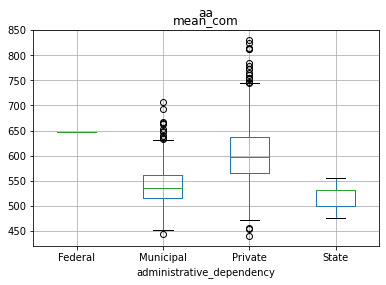

In [272]:
sp.boxplot(column = 'mean_com', by = 'administrative_dependency')
plt.suptitle('aa')

We can see that the Private ones are better than the other ones - there are only one federal school and only few state schools, and that makes hard to compare them. But, between the private and the municpal schools are a big difference on the Composition grade.   
It's nice to see that there are a lot of private schools that are worse than state and municipal schools - and the lowest grade was from a private school.   
Can you conclude that private schools are better than the public schools, in general? I guess so. The medians are too distant.

## 3.3 Technical schools

In [264]:
# Vimos que as técnicas se destacaram. Vejamos como elas são administradas

tec_filter = sp['school_name'].str.contains('TEC')
sp_tec = sp[tec_filter]
sp_tec.loc[tec_filter, 'administrative_dependency'].value_counts()

Municipal    37
Private       7
Name: administrative_dependency, dtype: int64

In [265]:
# Quais são as técnicas privadas?

sp_tec.loc[sp['administrative_dependency'] == 'Private',
         ['school_name', 'mean_com', 'administrative_dependency']]

# Note que há erros

,school_name,mean_com,administrative_dependency
132430,LICEU DE ARTES E OFICIOS DE SAO PAULO ESCOLA T...,814.26,Private
132743,WALTER BELIAN ESCOLA TECNICA,737.31,Private
137040,CETEC COLEGIO,565.10,Private
137590,EAG EAG COLEGIO TECNICO,504.76,Private
137891,COLEGIO GUARARAPES EIEFEM E TECNICO,563.23,Private
142462,PAULISTA COLEGIO TECNICO,548.46,Private
142978,TECLA COLEGIO,564.71,Private


In [266]:
# Quais as melhores públicas não técnicas?

sp_pub.loc[~tec_filter, ['school_name', 'mean_mat', 'school_size']].sort_values(
    by = 'mean_mat', ascending = False).head(20)

,school_name,mean_mat,school_size
145625,IFSP - CAMPUS SAO PAULO,702.40,More than 90 students
123351,ARISTIDES DE CASTRO,553.03,Between 1 and 30 students
123362,OSWALDO ARANHA,500.54,Between 31 and 60 students
131150,ESCOLA DE APLICACAO DA FACULDADE DE EDUCACAO D...,497.50,Between 31 and 60 students
123286,ALEXANDRE VON HUMBOLDT,496.26,More than 90 students
123250,JOSE MONTEIRO BOANOVA PROFESSOR,495.87,Between 61 and 90 students
123008,JOAO BORGES PROFESSOR,488.98,More than 90 students
123579,ALBERTO SALOTTI PROF EE,488.32,More than 90 students
123331,FABIANO LOZANO MAESTRO,488.30,More than 90 students
123317,ARCY MAJOR,488.05,Between 31 and 60 students


In [267]:
tec_filter = np.where(sp_pub['school_name'].str.contains('TEC'),
                      'Technical', 'Not Technical')
sp_pub.groupby(tec_filter)['mean_mat'].mean()

Not Technical    459.073711
Technical        558.656486
Name: mean_mat, dtype: float64